In [549]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings("ignore")

import re
from pylab import rcParams
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import sklearn
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import nltk

In [550]:
# Import Train
df_train = pd.read_csv('train.csv')
df_train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [551]:
train_ndf = df_train
test_ndf = df_test

<AxesSubplot:xlabel='sentiment', ylabel='count'>

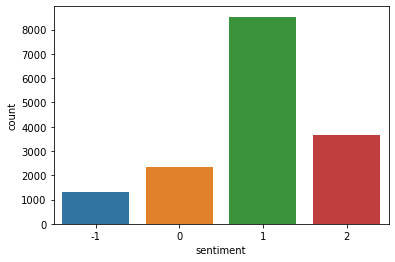

In [552]:
sns.countplot(train_ndf['sentiment'])

In [553]:
# Import Test
df_test = pd.read_csv('test_with_no_labels.csv')

In [554]:
#check value difference
train_ndf['sentiment'].value_counts()

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

In [555]:
EMOJIS = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad', 
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed', 
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink', 
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}
URLPATTERN        = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
USERPATTERN       = '@[^\s]+'
SEQPATTERN   = r"(.)\1\1+"
SEQREPLACE = r"\1\1"

In [556]:
def prepro_message(mesg):
    mesg = re.sub(r"http\S+", "", mesg)
    ### Replacing URL
    mesg = re.sub(URLPATTERN,' URL',mesg)
    ### Removing non-alphabets
    mesg = re.sub('[^a-zA-z]'," ",mesg)
    ### Replacing EMOJI
    for emoji in EMOJIS.keys():
        mesg = mesg.replace(emoji, "EMOJI" + EMOJIS[emoji])  
    return mesg

In [557]:
train_ndf['message'] = train_ndf['message'].apply(prepro_message)

df_train['message'].iloc[0]

'PolySciMajor EPA chief doesn t think carbon dioxide is main cause of global warming and   wait  what    via  mashable'

In [558]:
train_ndf['message'].iloc[0]

'PolySciMajor EPA chief doesn t think carbon dioxide is main cause of global warming and   wait  what    via  mashable'

In [559]:
test_ndf ['message'] = test_ndf['message'].apply(prepro_message)
df_test['message'].iloc[0]

'Europe will now be looking to China to make sure that it is not alone in fighting climate change… https://t.co/O7T8rCgwDq'

In [560]:
test_ndf['message'].iloc[0]

'Europe will now be looking to China to make sure that it is not alone in fighting climate change  '

In [561]:
TFID = TfidfVectorizer(stop_words='english', 
                             min_df=2, 
                             max_df=0.90, 
                             ngram_range=(1, 3))

In [562]:
X = train_ndf['message']
y = train_ndf['sentiment']

In [563]:
###test
X_t = test_ndf['message']

In [564]:
X_tr= TFID.fit_transform(X)

In [565]:
X_fintest = TFID.transform(X_t)

In [597]:
# get training and testing data 
X_train, X_test, y_train, y_test = train_test_split(X_tr, y, test_size=0.10, random_state=10)

In [598]:
#Non-Linear model
svc = SVC(kernel='rbf')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

print("The accuracy score of the SVC is:", accuracy_score(y_test, y_pred))
print("\n\nClassification Report:\n\n",classification_report(y_test, y_pred))

The accuracy score of the SVC is: 0.7281921618204804


Classification Report:

               precision    recall  f1-score   support

          -1       0.88      0.28      0.43       132
           0       0.81      0.28      0.42       230
           1       0.69      0.95      0.80       840
           2       0.84      0.66      0.74       380

    accuracy                           0.73      1582
   macro avg       0.81      0.54      0.60      1582
weighted avg       0.76      0.73      0.70      1582



In [599]:
final_y_pred= svc.predict(X_fintest)

In [596]:
test_ndf['sentiment'] = final_y_pred

In [600]:
test_ndf[['tweetid','sentiment']].to_csv('non_LinearSVC3.csv', index=False)

In [601]:
parameters = {'kernel':('linear', 'rbf'),
              'C':(0.25,1.0),
              'gamma': (1,2)}

In [ ]:
svm = SVC()
clf = GridSearchCV(svm, parameters)
clf.fit(X_train,y_train)

In [ ]:
y_opt = clf.predict(X_test)
print("The accuracy for our tuned model is: ", accuracy_score(y_test, y_opt))